## *Exploratory Data Analysis on Superstore Sales Dataset.*

### Dataset link-- https://www.kaggle.com/datasets/jr2ngb/superstore-data

### Brief Overview of the dataset

#####  -The Superstore dataset provides sales and profit data for a variety of products across different categories and regions.
#####  -The goal of this project is to analyze the data and identify insights that can help the company improve its business performance. 


In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [223]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)


In [224]:
import warnings
warnings.filterwarnings('ignore') 

### Gather data

In [225]:
import pandas as pd
try:
    data = pd.read_csv(r'superstore_dataset2011-2015.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(r'superstore_dataset2011-2015.csv', encoding='latin1')


#### Data exploration 

- Check type of data columns by showing the first 5 rows 

In [227]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,01-01-2011,05-01-2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium


### Get information about the dataset 

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

### Check  for null values in the dataset 


In [229]:
data.isnull().sum()

# CONCLUSION - Only 'Postal Code' column contains null vlaues 

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

### Check for duplicate data and drop them

In [230]:
print("duplicate values present or not \n ",data.duplicated()) 

duplicate values present or not 
  0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool


### Drop unnecessary columns

In [231]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [232]:
data= data.drop(['Row ID','Order ID','Customer ID','Customer Name','Postal Code'],axis=1) 

## Analysis of product categories having highest profit margin


In [233]:
data['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [234]:
data.groupby('Category')['Profit'].sum().sort_values(ascending=False) 

Category
Technology        663778.733
Office Supplies   518473.834
Furniture         285204.724
Name: Profit, dtype: float64

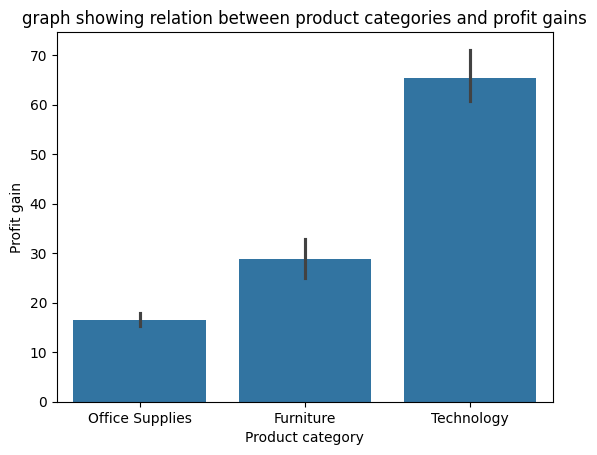

In [235]:
sns.barplot(x='Category', y='Profit', data=data)
plt.title('graph showing relation between product categories and profit gains')
plt.xlabel('Product category') 
plt.ylabel('Profit gain') 
plt.show()

#CONCLUSION- Technology products have the highest profit gain.

### Analysis to show regions having the highest sale 

In [236]:
total_sales=data.groupby('Region', as_index=False)['Sales'].sum()

print(total_sales)

            Region       Sales
0           Africa  783773.211
1           Canada   66928.170
2        Caribbean  324280.861
3          Central 2822302.520
4     Central Asia  752826.567
5             EMEA  806161.311
6             East  678781.240
7            North 1248165.603
8       North Asia  848309.781
9          Oceania 1100184.612
10           South 1600907.041
11  Southeast Asia  884423.169
12            West  725457.824


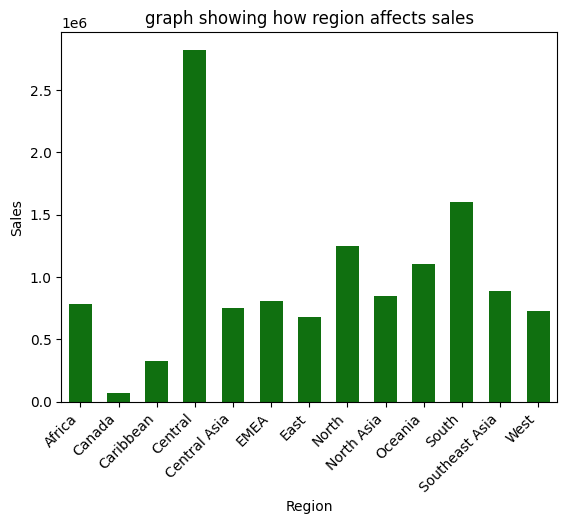

In [237]:
sns.barplot(x='Region', y='Sales', data=total_sales,ci=None, width=0.6,color='green')
plt.title('graph showing how region affects sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right') 
plt.show()

#Conclusion- Central region has the highest sale followed by South region and North region


## Monthly variation of sales 

In [238]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [239]:
data['Order Month']=pd.DatetimeIndex(data['Order Date']).month 
data['Order Month'] 


0         1
1         1
2         1
3         1
4         1
         ..
51285    12
51286    12
51287    12
51288    12
51289    12
Name: Order Month, Length: 51290, dtype: int32

In [254]:
data['Order Month'] = data['Order Date'].dt.strftime('%B')
print(data['Order Month']) 

# The above code extracts the month name (e.g., 'January', 'February') from the datetime objects using the %B format code.
# 'Order Month column is replaced by the month name

0         January
1         January
2         January
3         January
4         January
           ...   
51285    December
51286    December
51287    December
51288    December
51289    December
Name: Order Month, Length: 51290, dtype: object


In [255]:
# Convert 'Order Month' to a categorical type with the specified order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

data['Order Month'] = pd.Categorical(data['Order Month'], categories=month_order, ordered=True)

# Sort the DataFrame by 'Order Month'
data = data.sort_values('Order Month') 
data.tail(5)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Processing Time,Sales per Unit
5650,2012-12-06,2012-12-06,Same Day,Consumer,Marion,Ohio,United States,US,East,TEC-PH-10001578,...,Polycom SoundStation2 EX Conference phone,485.940,2,0.400,-89.089,122.200,High,December,0,242.970
5649,2012-12-06,2012-12-10,Standard Class,Consumer,North Las Vegas,Nevada,United States,US,West,OFF-ST-10000078,...,Tennsco 6- and 18-Compartment Lockers,1325.850,5,0.000,238.653,136.240,High,December,4,265.170
5648,2012-12-06,2012-12-10,Standard Class,Consumer,New York City,New York,United States,US,East,TEC-AC-10002637,...,Logitech VX Revolution Cordless Laser Mouse fo...,1619.910,9,0.000,97.195,223.310,High,December,4,179.990
5646,2012-12-06,2012-12-06,Same Day,Consumer,Piatra-Neamt,Neamt,Romania,EMEA,EMEA,TEC-HEW-10003460,...,"Hewlett Fax and Copier, Color",1554.480,8,0.000,341.760,366.580,High,December,0,194.310
51289,2014-12-31,2015-01-04,Standard Class,Consumer,Loveland,Colorado,United States,US,West,OFF-FA-10003472,...,Bagged Rubber Bands,3.024,3,0.200,-0.605,0.170,Medium,December,4,1.008


In [ ]:
total_sales=data.groupby('Order Month',as_index=False)['Sales'].sum() 
total_sales

,Order Month,Sales
0,January,675133.672
1,February,543739.380
2,March,770500.941
3,April,698561.212
4,May,904012.338
5,June,1269716.754
6,July,749381.837
7,August,1293833.165
8,September,1437380.110
9,October,1168184.386


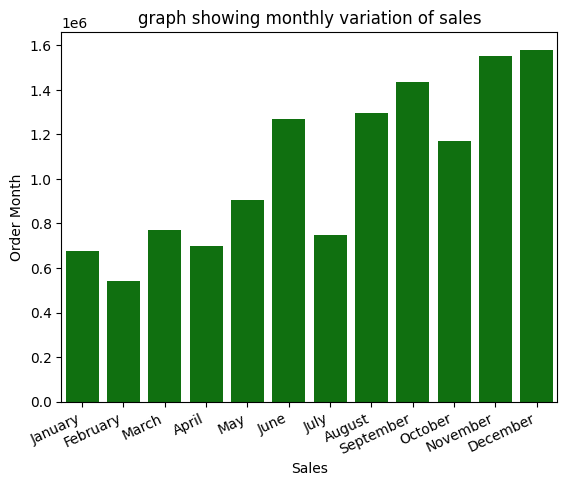

In [ ]:
sns.barplot(x='Order Month', y='Sales', data=total_sales,color="green") 
plt.title('graph showing monthly variation of sales')
plt.xlabel('Sales') 
plt.ylabel('Order Month') 
plt.xticks(rotation=25, ha='right')           
plt.show() 

#CONCLUSION- The barplot shows that winter season i.e. the month of november and december shows the highest sale.

## Relation between returned products percentage with shipping duration

In [ ]:
data['Ship Mode'].size

51290

Ship Mode
First Class      25.077
Same Day         23.917
Second Class     24.076
Standard Class   24.481
dtype: float64


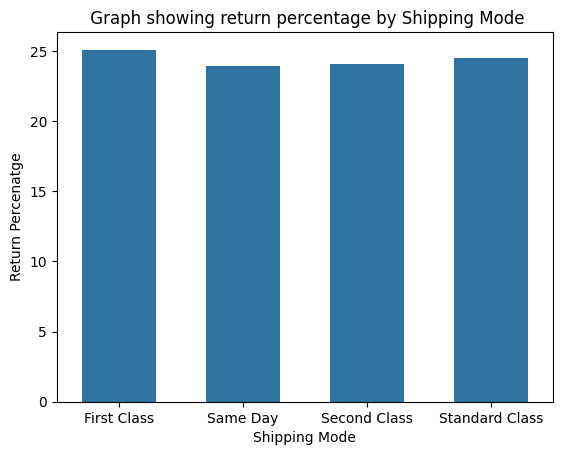

In [ ]:
total_orders_by_shipping_mode=data.groupby('Ship Mode').size()

returned_orders_by_shipping_mode=data[data['Profit']<0].groupby('Ship Mode').size()

returned_per_by_shipping_mode=(returned_orders_by_shipping_mode/total_orders_by_shipping_mode)*100 #percentage of products returned.

print(returned_per_by_shipping_mode)

sns.barplot(returned_per_by_shipping_mode,width=0.6)
plt.title(" Graph showing return percentage by Shipping Mode") 
plt.xlabel("Shipping Mode")
plt.ylabel("Return Percenatge")
plt.show()  

#CONCLUSION- We see that percentage of returned products does not vary mucjh eith the shipping mode,although First Class Ship Mode has slightly higher return rate.

## Varaition of company profit throughout the week

In [ ]:
data['Order Day']=pd.DatetimeIndex(data['Order Date']).day_name()
print(data['Order Day']) 

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
51285    Wednesday
51286    Wednesday
51287    Wednesday
51288    Wednesday
51289    Wednesday
Name: Order Day, Length: 51290, dtype: object


In [260]:
# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Order Day' to a categorical type with the specified order
data['Order Day'] = pd.Categorical(data['Order Day'], categories=day_order, ordered=True)

# Group by 'Order Day' and sum the 'Profit'
week_profit = data.groupby('Order Day', as_index=False)['Profit'].sum()

# Sort the DataFrame by 'Order Day'
week_profit = week_profit.sort_values('Order Day')

# Display the sorted DataFrame
print(week_profit)

   Order Day     Profit
0     Monday 251746.556
1    Tuesday 251164.394
2  Wednesday 242405.562
3   Thursday 278366.432
4     Friday 276753.967
5   Saturday 137489.068
6     Sunday  29531.313


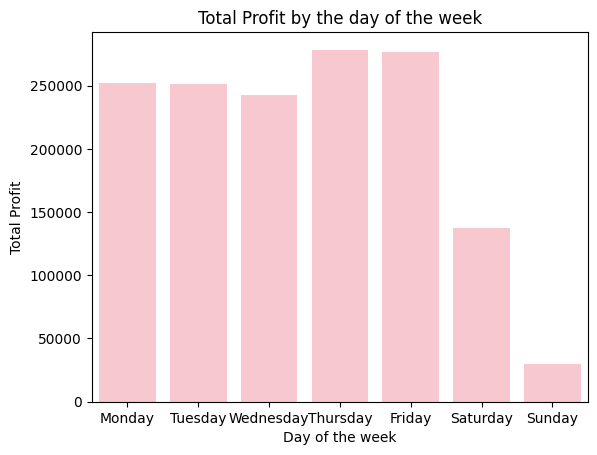

In [261]:
sns.barplot(x='Order Day',y='Profit',data=week_profit,color="pink")
plt.title("Total Profit by the day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Total Profit")
plt.show()  

#CONCLUSION - Profit is high on weekdays but decreases on weekends.

## Relation between processing time and profit gains

### Calculating Processing Time from the dataset

In [242]:
# In the dataset Dates are in the format "day-month-year"
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y', errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d-%m-%Y', errors='coerce')


print(data[['Order Date', 'Ship Date']].isnull().sum()) #check if order date ans=d ship date has any null value 
print(data[['Order Date', 'Ship Date']].head()) 


Order Date    0
Ship Date     0
dtype: int64
  Order Date  Ship Date
0 2011-01-01 2011-01-06
1 2011-01-01 2011-01-08
2 2011-01-01 2011-01-05
3 2011-01-01 2011-01-05
4 2011-01-01 2011-01-08


In [243]:
data.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

In [244]:
data['Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days #this will create a column called Processing Time containing the number of days required to ship item.
data['Sales per Unit'] = data['Sales'] / data['Quantity']


print(data['Processing Time'].unique()) 


[5 7 4 2 3 6 0 1]


In [245]:
processing_time_profit= data.groupby('Processing Time',as_index=False)['Profit'].sum()  
print(processing_time_profit) 

   Processing Time     Profit
0                0  73451.615
1                1  43420.390
2                2 205308.114
3                3 137028.506
4                4 418310.882
5                5 319992.090
6                6 176082.897
7                7  93862.797


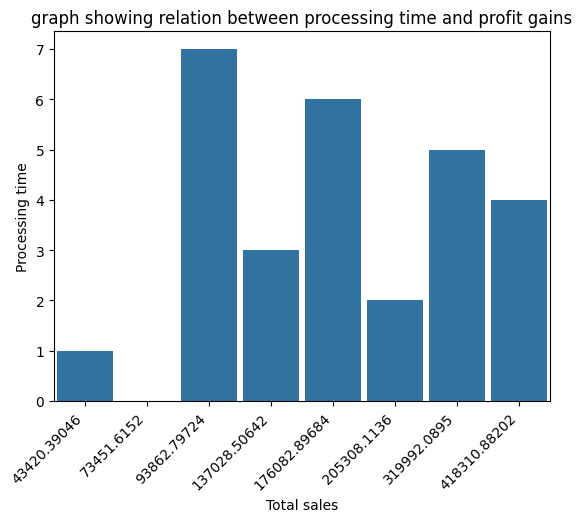

In [246]:
sns.barplot(x='Profit',y='Processing Time',data=processing_time_profit,width=0.9)
plt.title('graph showing relation between processing time and profit gains')
plt.xlabel('Total sales')
plt.ylabel('Processing time')          
plt.xticks(rotation=45, ha='right')
plt.show()      
# CONCLUSION - PROFIT IS MAXIMUM WHEN PROCESSING TIME IS BETWEEN 4 TO 5 DAYS

## Relation between Processing Time and Sales

In [ ]:
processing_time_sales= data.groupby('Processing Time',as_index=False)['Sales'].sum()  
print(processing_time_sales) 

   Processing Time       Sales
0                0  647618.668
1                1  415154.286
2                2 1797886.534
3                3 1206713.157
4                4 3592034.155
5                5 2694168.883
6                6 1511281.616
7                7  777644.611


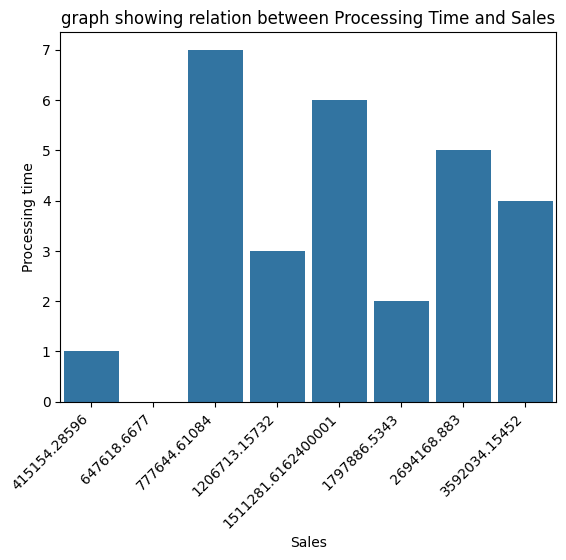

In [ ]:
sns.barplot(x='Sales',y='Processing Time',data=processing_time_sales,width=0.9)
plt.title('Graph showing relation between Processing Time and Sales')
plt.xlabel('Sales')
plt.ylabel('Processing time')          
plt.xticks(rotation=45, ha='right')
plt.show()                  
# CONCLUSION - SALES IS MAXIMUM WHEN PROCESSING TIME IS BETWEEN 4 TO 5 DAYS. sAles in lowest when it takes a full week.

## Analysing the variation of  Profit relative to Processing time and Ship Mode

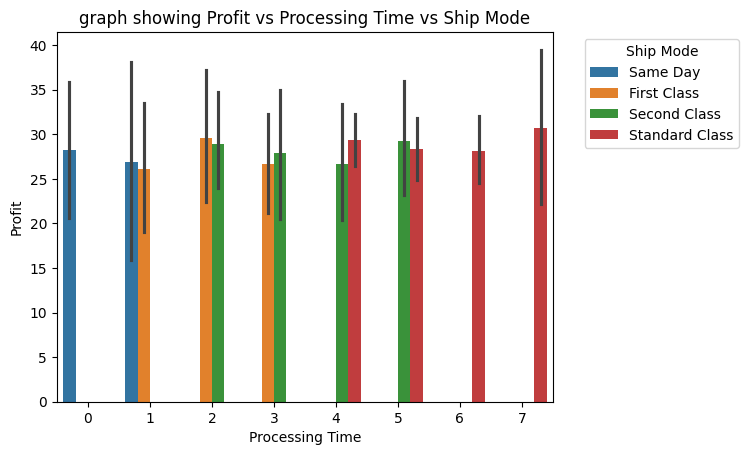

In [247]:
new_data=data[['Ship Mode','Profit','Processing Time']]
sns.barplot(x='Processing Time',y='Profit',data=new_data,hue='Ship Mode')  
plt.title('graph showing Profit vs Processing Time vs Ship Mode') 
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

## Analysing the variation of Sales relative to Processing time and Ship Mode

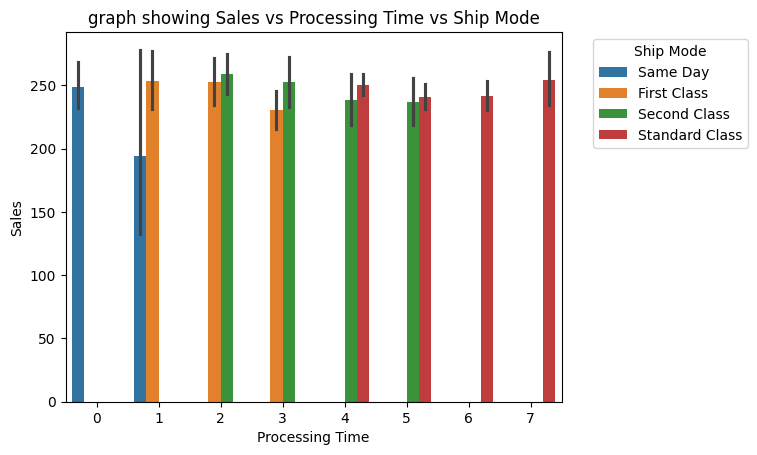

In [ ]:
new_data=data[['Ship Mode','Sales','Processing Time']]
sns.barplot(x='Processing Time',y='Sales',data=new_data,hue='Ship Mode')  #CHECK THIS GRAPH
plt.title('graph showing Sales vs Processing Time vs Ship Mode') 
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Top countries influencing Sales

In [ ]:
data['Country'].unique()

In [ ]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [251]:
country_wise_sales=data.groupby('Country')['Sales'].sum()  

df = country_wise_sales.reset_index()  #convert the series to  a dataframe. df is the new dataframe created from 'data' dataframe which only has country and its corresponding total sales 

print(df.head(5))
print(df.loc[0])

       Country     Sales
0  Afghanistan 21673.320
1      Albania  3888.120
2      Algeria 36091.590
3       Angola 25554.000
4    Argentina 57511.783
Country    Afghanistan
Sales        21673.320
Name: 0, dtype: object


In [252]:
top_10_country=df.nlargest(15,'Sales') [['Country','Sales']] 
top_10_country

,Country,Sales
139,United States,2297200.860
6,Australia,925235.853
44,France,858931.083
26,China,700562.025
47,Germany,628840.030
81,Mexico,622590.618
57,India,589650.105
138,United Kingdom,528576.300
58,Indonesia,404887.498
17,Brazil,361106.419


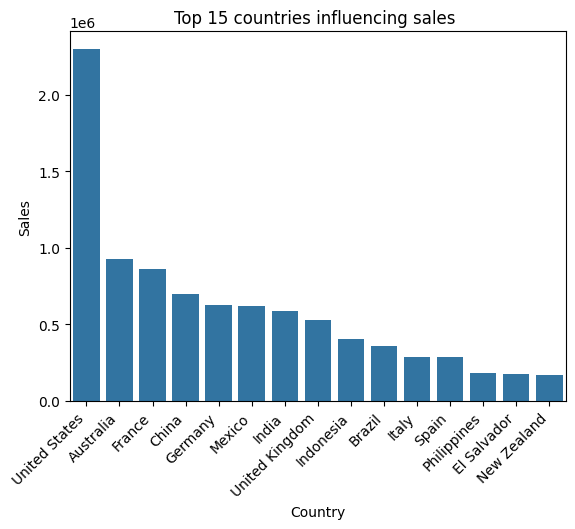

In [253]:
sns.barplot(x='Country',y='Sales',data=top_10_country) 
plt.title('Top 15 countries influencing sales ')
plt.xticks(rotation=45, ha='right')
plt.show()

# CONCLUSION -  we see that United states has the highest Sales 

## Product type analysis on Sales

In [ ]:
data['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [ ]:
segment_sales=data.groupby('Segment',as_index=False)['Sales'].sum() 
segment_sales

,Segment,Sales
0,Consumer,6507949.418
1,Corporate,3824697.521
2,Home Office,2309854.971


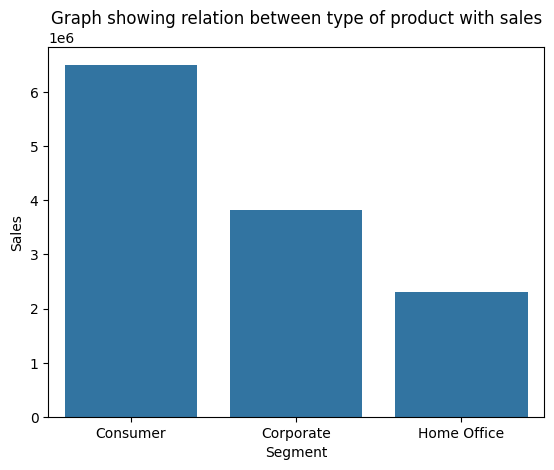

In [ ]:
sns.barplot(x='Segment',y='Sales',data=segment_sales) 
plt.title('Graph showing relation between type of product with sales')  
plt.show()

#CONCLUSION - Consumer type of prodicts produces highest sale

## Order priority influencing Sales

In [ ]:
data['Order Priority'].unique()

array(['Medium', 'Low', 'Critical', 'High'], dtype=object)

In [ ]:
order_priority=data.groupby('Order Priority',as_index=False)['Sales'].sum() 
order_priority

,Order Priority,Sales
0,Critical,986235.464
1,High,3807548.144
2,Low,567825.928
3,Medium,7280892.374


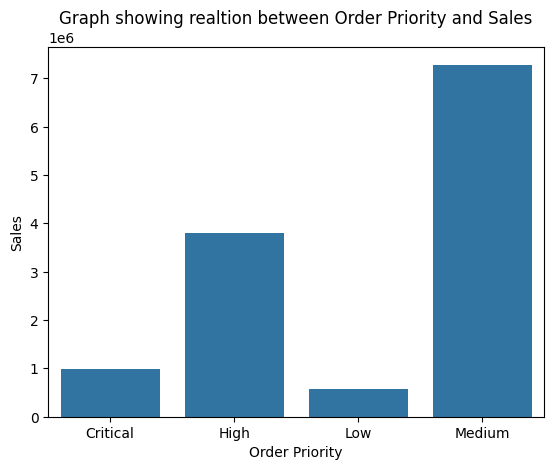

In [ ]:
sns.barplot(x='Order Priority',y='Sales',data=order_priority) 
plt.title('Graph showing relation between Order Priority and Sales')  
plt.show()

# CONCLUSION - Medium order priority have the highest sales.

### 

##  Product subcategory affecting sales

In [ ]:
data['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [ ]:
data['Sub-Category'].unique()

array(['Storage', 'Appliances', 'Furnishings', 'Accessories', 'Art',
       'Phones', 'Labels', 'Chairs', 'Machines', 'Binders', 'Fasteners',
       'Paper', 'Envelopes', 'Bookcases', 'Copiers', 'Tables', 'Supplies'],
      dtype=object)

In [ ]:
category_analysis=data.groupby('Category',as_index=False)['Sub-Category'].count() 
category_analysis

,Category,Sub-Category
0,Furniture,9876
1,Office Supplies,31273
2,Technology,10141


In [ ]:
grouped = data.groupby('Category')['Sub-Category'].unique().reset_index()

# Display the grouped DataFrame
print(grouped.dtypes)

Category        object
Sub-Category    object
dtype: object


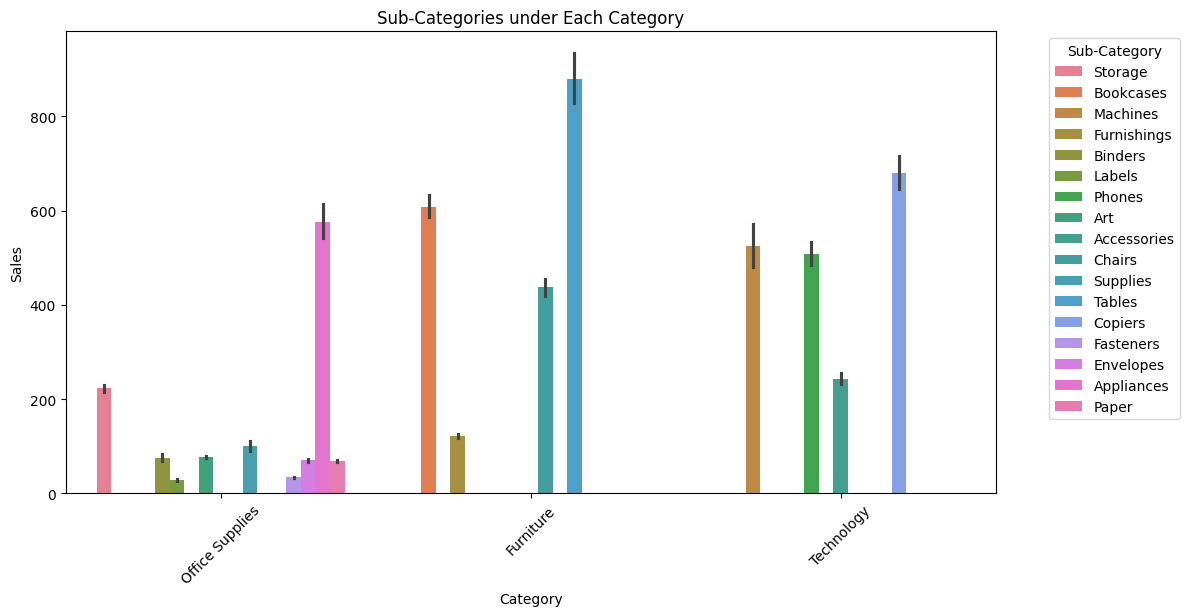

In [266]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Category',y='Sales', hue='Sub-Category')
plt.title('Sub-Categories under Each Category') 
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45) 
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()